## Company sales analysis by Chigozie Chukwu

## Introduction

An annonymous company wants to give award during their end of the year's party and needs to know the best manager in terms of sales. They also want to know the company's performanance Inorder to improve in the coming the year. 
Three tables containing the company's sales data, returned item data and regional manager data were provided and these will be used to answer their questions.

## Questions

1. The Organization is planning to gift the best performing manager who made the best sales and want to know the region which the manager belongs to?
2. How many times was delivery truck used as the ship mode? how many orders were returned, and which product category got rejected the most?
3. Which Year did the company incurred the least shipping cost? display the day of the week in which customer segment has the most sales?
4. Determine its profitability by knowing the actual orders that were delivered?
5. The Organization is eager to know the customer names and persons born in 2011?
6. what are the aggregate orders made by all the customers?
7. The company intends to discontinue any product that brings in the least profit, what are these products?
8. what are the top 2 best selling items that the company should keep selling?

In [24]:
## importing python packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
## Loading my dataset using pandas
manager=pd.read_csv('regional_manager.csv')
item=pd.read_csv('returned_item.csv')
transaction=pd.read_csv('sales_transaction.csv')

Loading my dataset to see the general features and to perform data wrangling on the dataset

In [26]:
## Manual wrangling
manager

,Column1,Column2
0,Region,Manager
1,Nunavut,Chris
2,Northwest Territories,Erin
3,Atlantic,Sam
4,Prarie,William
5,West,Pat
6,Ontario,Pat
7,Quebec,Pat
8,Yukon,Pat


In [27]:
## Observing my table
item

,id,Order ID,sales_id,Order status
0,1,3,1,Delivered
1,2,6,2,Delivered
2,3,32,3,Delivered
3,4,32,4,Delivered
4,5,32,5,Delivered
...,...,...,...,...
8394,8395,59971,8395,Delivered
8395,8396,59971,8396,Delivered
8396,8397,59971,8397,Delivered
8397,8398,59973,8398,Delivered


In [28]:
## Observing my table
transaction

,sales_id,Order_id,REALORDERDATE,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,First Name,Last Name,Region,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship_Date,Birth_Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed,MacIntyre,Nunavut,Small Business,Office Supplies,Storage & Organization,Large Box,10/20/2010,04/08/1970
1,49,293,10/01/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry,French,Nunavut,Consumer,Office Supplies,Appliances,Jumbo Drum,10/02/2012,5/14/1969
2,50,293,10/01/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry,French,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,10/03/2012,08/12/1969
3,80,483,07/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay,Rozendal,Nunavut,Corporate,Technology,Telephones and Communication,Small Box,07/12/2011,2/15/1972
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos,Soltero,Nunavut,Consumer,Office Supplies,Appliances,Medium Box,8/30/2010,08/08/1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,08/09/2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick,Brown,West,Consumer,Furniture,Bookcases,Jumbo Box,08/09/2010,6/16/1965
8395,7766,55558,08/09/2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick,Brown,West,Consumer,Office Supplies,Envelopes,Small Box,08/11/2010,06/01/1964
8396,7906,56550,04/08/2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank,Hawley,West,Home Office,Furniture,Office Furnishings,Small Pack,04/10/2011,03/11/1964
8397,7907,56550,04/08/2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank,Hawley,West,Home Office,Technology,Telephones and Communication,Small Box,04/09/2011,8/27/1964


In [29]:
## General features
manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  9 non-null      object
 1   Column2  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [30]:
## General info
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8399 non-null   int64 
 1   Order ID      8399 non-null   int64 
 2   sales_id      8399 non-null   int64 
 3   Order status  8399 non-null   object
dtypes: int64(3), object(1)
memory usage: 262.6+ KB


In [31]:
## Looking out for duplicates
item.duplicated().sum()

0

In [32]:
## Check the general features 
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_id              8399 non-null   int64  
 1   Order_id              8399 non-null   int64  
 2   REALORDERDATE         8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  First Name            8399 non-null   object 
 12  Last Name             8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

In [33]:
## Descriptive features of the data
manager.describe()

,Column1,Column2
count,9,9
unique,9,6
top,Region,Pat
freq,1,4


In [34]:
## Descriptive features of the data
item.describe()

,id,Order ID,sales_id
count,8399.000000,8399.000000,8399.000000
mean,4200.000000,29965.179783,4200.000000
std,2424.726789,17260.883447,2424.726789
min,1.000000,3.000000,1.000000
25%,2100.500000,15011.500000,2100.500000
50%,4200.000000,29857.000000,4200.000000
75%,6299.500000,44596.000000,6299.500000
max,8399.000000,59973.000000,8399.000000


In [35]:
## Descriptive features of the data
transaction.describe()

,sales_id,Order_id,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


In [36]:
## Check for duplicate values in transaction table
transaction.duplicated().sum()

0

In [37]:
## Check for null values, this will be dropped when tables have been merged
transaction.isnull().sum()

sales_id                 0
Order_id                 0
REALORDERDATE            0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
First Name               0
Last Name                0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Ship_Date                0
Birth_Date              30
dtype: int64

Quality issues
1. erroneous datatypes
2. null values

Tidiness issues
1. non unified column names 
2. Irrelavant columns
3. managers and item table should be part of transaction table

## Issue 1

Non unified column names.

In [38]:
## Replace extra space in column title with underscore and change letters to lower case
transaction.columns = transaction.columns.str.replace(' ', '_')
transaction.columns = transaction.columns.str.lower()

In [39]:
## Testing
transaction.sample(1)

,sales_id,order_id,realorderdate,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,shipping_cost,first_name,last_name,region,customer_segment,product_category,product_sub-category,product_container,ship_date,birth_date
7609,6200,43911,1/14/2009,Medium,29,577.89,0.06,Regular Air,-53.89,19.99,11.17,Tamara,Manning,West,Corporate,Furniture,Office Furnishings,Large Box,1/14/2009,6/14/1968


In [40]:
## Replace extra space in column title with underscore and change letters to lower case
item.columns = item.columns.str.replace(' ', '_')
item.columns = item.columns.str.lower()

In [41]:
## Testing
item.sample(1)

,id,order_id,sales_id,order_status
1941,1942,13920,1942,Delivered


## Making copies of the original data

I am about to make enormous changes in the original data and the wise thing to do is to ensure my original data remains intact, incase I need to access them later for clarity.

In [42]:
# Make copies of original pieces of data
manager_c = manager.copy()
item_c = item.copy()
transaction_c = transaction.copy()

## Issue 2

Irrelavant columns present in the item table.

In [43]:
##drop id column in item table
item_c.drop('id', inplace=True, axis=1)

In [44]:
## Testing
item_c.sample(1)

,order_id,sales_id,order_status
6255,44292,6256,Returned


## Issue 3

Managers and item table should be part of transaction table.

In [45]:
## Merge item table to transaction table
new_transaction = pd.merge(transaction_c, item_c, how='inner')

In [46]:
## testing
new_transaction.sample(2)

,sales_id,order_id,realorderdate,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,first_name,last_name,region,customer_segment,product_category,product_sub-category,product_container,ship_date,birth_date,order_status
1359,1363,9922,04/03/2011,Not Specified,24,6408.30,0.10,Delivery Truck,539.54,280.98,...,Jack,O'Briant,Atlantic,Consumer,Furniture,Tables,Jumbo Box,04/04/2011,2/19/1974,Delivered
5752,7695,55171,10/26/2012,High,29,575.89,0.06,Regular Air,-14.04,19.98,...,Jennifer,Jackson,Prarie,Home Office,Technology,Computer Peripherals,Small Box,10/27/2012,2/27/1977,Delivered


In [47]:
## unique column values in the new transaction table
new_transaction.region.unique()

array(['Nunavut', 'Northwest Territories', 'Atlantic', 'Prarie', 'West',
       'Ontario', 'Quebec', 'Yukon'], dtype=object)

In [48]:
## Create a new column to include the manager from the manager table by using function
def categorise(row):  
    if row['region'] == 'Nunavut':
        return 'Chris'
    elif row['region'] == 'Northwest Territories':
        return 'Erin'
    elif row['region'] == 'Atlantic':
        return 'Sam'
    elif row['region'] == 'Prarie':
        return 'William'
    return 'Pat'

In [49]:
## Applying the function to create a new column on the transaction table that includes the manager
new_transaction['manager'] = new_transaction.apply(lambda row: categorise(row), axis=1)

In [50]:
## Testing
new_transaction.sample(1)

,sales_id,order_id,realorderdate,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,last_name,region,customer_segment,product_category,product_sub-category,product_container,ship_date,birth_date,order_status,manager
7108,5859,41574,9/20/2010,High,23,283.82,0.01,Regular Air,-38.94,11.97,...,Murry,West,Corporate,Office Supplies,Pens & Art Supplies,Small Pack,9/22/2010,08/04/1955,Delivered,Pat


## Issue 4

Erroneous data types

In [51]:
## Fixing erroneous datatypes
new_transaction['sales_id'] = transaction_c['sales_id'].astype(str)
new_transaction['order_id'] = transaction_c['order_id'].astype(str)
new_transaction['realorderdate'] = pd.to_datetime(transaction_c['realorderdate'])
new_transaction['ship_date'] = pd.to_datetime(transaction_c['ship_date'])
new_transaction['birth_date'] = pd.to_datetime(transaction_c['birth_date'])

In [52]:
## Converting sales column to int
new_transaction['sales'] = transaction_c['sales'].astype(int)
## Converting shipping cost column to int
new_transaction['shipping_cost'] = transaction_c['shipping_cost'].astype(int)
## Converting profit from float to int
new_transaction['profit'] = transaction_c['profit'].astype(int)
## converting customer_segment from str to cat data type
new_transaction['customer_segment'] = transaction_c['customer_segment'].astype('category')

In [55]:
## Testing
new_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sales_id              8399 non-null   object        
 1   order_id              8399 non-null   object        
 2   realorderdate         8399 non-null   datetime64[ns]
 3   order_priority        8399 non-null   object        
 4   order_quantity        8399 non-null   int64         
 5   sales                 8399 non-null   int32         
 6   discount              8399 non-null   float64       
 7   ship_mode             8399 non-null   object        
 8   profit                8399 non-null   int32         
 9   unit_price            8399 non-null   float64       
 10  shipping_cost         8399 non-null   int32         
 11  first_name            8399 non-null   object        
 12  last_name             8399 non-null   object        
 13  region            

## Issue 5

Date columns should be separated into day, month and year

In [56]:
## separate the day, month and year into different columns
# For realorderdate
new_transaction['salesday'] = new_transaction['realorderdate'].dt.day
new_transaction['salesmonth'] = new_transaction['realorderdate'].dt.month
new_transaction['salesyear'] = new_transaction['realorderdate'].dt.year

In [57]:
## for ship date
new_transaction['shipday'] = new_transaction['ship_date'].dt.day
new_transaction['shipmonth'] = new_transaction['ship_date'].dt.month
new_transaction['shipyear'] = new_transaction['ship_date'].dt.year

In [58]:
## for birth date
new_transaction['birthday'] = new_transaction['birth_date'].dt.day
new_transaction['birthmonth'] = new_transaction['birth_date'].dt.month
new_transaction['birthyear'] = new_transaction['birth_date'].dt.year

In [59]:
## Testing
new_transaction.sample(1)

,sales_id,order_id,realorderdate,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,manager,salesday,salesmonth,salesyear,shipday,shipmonth,shipyear,birthday,birthmonth,birthyear
3238,6759,48161,2011-05-23,Not Specified,39,6030,0.09,Regular Air,1197,195.99,...,Pat,23,5,2011,24,5,2011,4.0,6.0,1974.0


## Issue 6

The actual day and month of the week should be in a separate column

In [60]:
## Getting the actual day(Monday...Sunday) and month(January...December) of each date
new_transaction['day_of_sales'] = new_transaction['realorderdate'].dt.day_name()
new_transaction['month_of_sales'] = new_transaction['realorderdate'].dt.month_name()
new_transaction['day_of_ship'] = new_transaction['ship_date'].dt.day_name()
new_transaction['month_of_ship'] = new_transaction['ship_date'].dt.month_name()
new_transaction['day_of_birth'] = new_transaction['birth_date'].dt.day_name()
new_transaction['month_of_birth'] = new_transaction['birth_date'].dt.month_name()

In [61]:
## Testing
new_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sales_id              8399 non-null   object        
 1   order_id              8399 non-null   object        
 2   realorderdate         8399 non-null   datetime64[ns]
 3   order_priority        8399 non-null   object        
 4   order_quantity        8399 non-null   int64         
 5   sales                 8399 non-null   int32         
 6   discount              8399 non-null   float64       
 7   ship_mode             8399 non-null   object        
 8   profit                8399 non-null   int32         
 9   unit_price            8399 non-null   float64       
 10  shipping_cost         8399 non-null   int32         
 11  first_name            8399 non-null   object        
 12  last_name             8399 non-null   object        
 13  region            

In [62]:
## Double testing
new_transaction.sample(5)

,sales_id,order_id,realorderdate,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,shipyear,birthday,birthmonth,birthyear,day_of_sales,month_of_sales,day_of_ship,month_of_ship,day_of_birth,month_of_birth
1713,8227,58789,2010-08-05,Low,38,377,0.02,Regular Air,-10,9.77,...,2010,9.0,6.0,1977.0,Thursday,August,Tuesday,August,Thursday,June
3091,166,1031,2009-08-31,Medium,34,226,0.00,Regular Air,-52,6.37,...,2009,13.0,8.0,1981.0,Monday,August,Wednesday,September,Thursday,August
6363,5465,38848,2012-12-16,High,6,259,0.06,Regular Air,45,43.41,...,2012,9.0,10.0,1972.0,Sunday,December,Monday,December,Monday,October
3636,3464,24672,2012-03-17,Medium,5,44,0.02,Regular Air,23,7.59,...,2012,4.0,7.0,1964.0,Saturday,March,Tuesday,March,Saturday,July
359,5662,40067,2012-02-17,Low,38,2157,0.00,Regular Air,519,65.99,...,2012,4.0,9.0,1982.0,Friday,February,Sunday,February,Saturday,September


## Issue 7

Null values

In [63]:
## Check for null values
new_transaction.isnull().sum()

sales_id                 0
order_id                 0
realorderdate            0
order_priority           0
order_quantity           0
sales                    0
discount                 0
ship_mode                0
profit                   0
unit_price               0
shipping_cost            0
first_name               0
last_name                0
region                   0
customer_segment         0
product_category         0
product_sub-category     0
product_container        0
ship_date                0
birth_date              30
order_status             0
manager                  0
salesday                 0
salesmonth               0
salesyear                0
shipday                  0
shipmonth                0
shipyear                 0
birthday                30
birthmonth              30
birthyear               30
day_of_sales             0
month_of_sales           0
day_of_ship              0
month_of_ship            0
day_of_birth            30
month_of_birth          30
d

In [64]:
## Drop null values
new_transaction.dropna(inplace=True)

In [65]:
## Testing
new_transaction.isnull().sum()

sales_id                0
order_id                0
realorderdate           0
order_priority          0
order_quantity          0
sales                   0
discount                0
ship_mode               0
profit                  0
unit_price              0
shipping_cost           0
first_name              0
last_name               0
region                  0
customer_segment        0
product_category        0
product_sub-category    0
product_container       0
ship_date               0
birth_date              0
order_status            0
manager                 0
salesday                0
salesmonth              0
salesyear               0
shipday                 0
shipmonth               0
shipyear                0
birthday                0
birthmonth              0
birthyear               0
day_of_sales            0
month_of_sales          0
day_of_ship             0
month_of_ship           0
day_of_birth            0
month_of_birth          0
dtype: int64

## Issue 8

Empty values in the ship_mode column should be replaced with 'unknown'

In [66]:
## Replacing '' in the ship mode column with unknown
new_transaction['ship_mode'] = new_transaction['ship_mode'].replace(["''"], "unknown")

In [67]:
## Testing
new_transaction.ship_mode.unique()

array(['Regular Air', 'Delivery Truck', 'Express Air', 'unknown'],
      dtype=object)

## Issue 9

The first and last name should be in a single column

In [68]:
## Merging the first and last name into a single column
new_transaction['full_name'] = np.where(new_transaction[['first_name', 'last_name']].eq('').any(axis=1),
                           new_transaction['order_id'],
                           new_transaction[['first_name', 'last_name']].apply(' '.join, axis=1))

In [69]:
## Testing
new_transaction.full_name.unique()

array(['Muhammed MacIntyre', 'Barry French', 'Clay Rozendal',
       'Carlos Soltero', 'Carl Jackson', 'Monica Federle',
       'Neola Schneider', 'Carlos Daly', 'Claudia Miner',
       'Allen Rosenblatt', 'Sylvia Foulston', 'Jim Radford',
       'Carl Ludwig', 'Don Miller', 'Annie Cyprus', 'Grant Carroll',
       'Alan Barnes', 'Jack Garza', 'Julia West', 'Eugene Barchas',
       'Edward Hooks', 'Brad Eason', 'Nicole Hansen', 'Dorothy Wardle',
       'Aaron Bergman', 'Don Jones', 'Beth Thompson', 'Frank Price',
       'Michelle Lonsdale', 'Ann Chong', 'Joy Bell', 'Skye Norling',
       'Barry Weirich', 'Adrian Hane', 'Andrew Gjertsen', 'Ralph Knight',
       'Beth Paige', 'Bryan Davis', 'Delfina Latchford', 'Doug Bickford',
       'Jamie Kunitz', 'Anthony Johnson', 'Brendan Dodson',
       'Hunter Glantz', 'Dorothy Badders', 'Thomas Seio', 'Becky Castell',
       'Cari Schnelling', 'Chad Cunningham', 'Bryan Mills', 'Rick Reed',
       'Heather Kirkland', 'Fred Wasserman', 'Jack Lebron

## Anwering questions

## Question 1
Which manager makes the best sales and what region does the manager belongs to?

In [70]:
## Total sales
new_transaction.sales.sum()

14839013

In [71]:
## Sales total per manager
c=(new_transaction.groupby(['manager']).sales.sum())
c.sort_values(ascending=False)

manager
Pat        9105637
William    2835167
Sam        1997256
Erin        786604
Chris       114349
Name: sales, dtype: int32

In [72]:
## profit per manager
c=(new_transaction.groupby(['manager']).profit.sum())
c.sort_values(ascending=False)

manager
Pat        851070
William    321347
Sam        236282
Erin       104427
Chris        3626
Name: profit, dtype: int32

Pat made the largest sales and had the largest profit made

In [73]:
## Sales total per region
c=(new_transaction.groupby(['region']).sales.sum())
c.sort_values(ascending=False)

region
West                     3575286
Ontario                  3057625
Prarie                   2835167
Atlantic                 1997256
Quebec                   1505306
Yukon                     967420
Northwest Territories     786604
Nunavut                   114349
Name: sales, dtype: int32

In [74]:
## Profit total per region
c=(new_transaction.groupby(['region']).profit.sum())
c.sort_values(ascending=False)

region
Ontario                  345613
Prarie                   321347
West                     293379
Atlantic                 236282
Quebec                   140612
Northwest Territories    104427
Yukon                     71466
Nunavut                    3626
Name: profit, dtype: int32

The largest sales was made in the West and the largest profit was made in Ontario

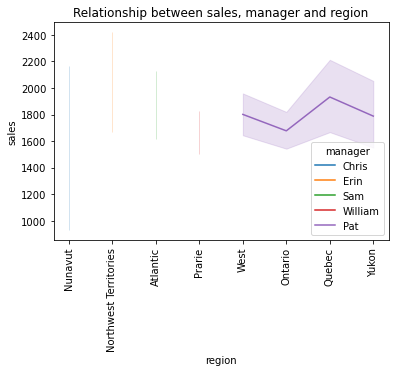

In [78]:
## Plotting
sb.lineplot(data=new_transaction, x='region', y='sales', hue='manager')
plt.title('Relationship between sales, manager and region')
plt.xticks(rotation = 90);

## Observation

Pat made the best sales and profit and manages four region; West, Quebec, Yukon and Ontario

## Question 2

How many times was delivery truck used as the ship mode?

Text(0.5, 1.0, 'Counts of each ship mode')

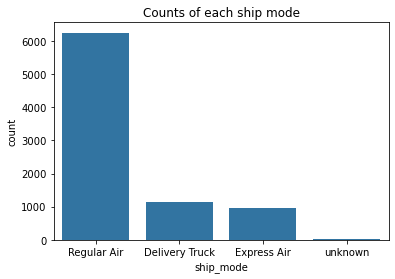

In [79]:
## setting the base color for my charts to avoid multiple colors
base_color = sb.color_palette()[0]
## To arrange my bars in decreasing order
gen_order = new_transaction['ship_mode'].value_counts().index
## Plotting
sb.countplot(data=new_transaction, x='ship_mode', color=base_color, order=gen_order);
plt.title('Counts of each ship mode')

In [80]:
## actual value of each
new_transaction['ship_mode'].value_counts()

Regular Air       6247
Delivery Truck    1140
Express Air        952
unknown             30
Name: ship_mode, dtype: int64


## Observation

Delivery truck was used as a ship mode for 1140 times

## Question 3

How many orders were returned, and which product category got rejected the most?

Text(0.5, 1.0, 'Counts of order status')

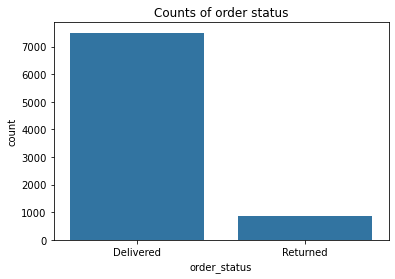

In [81]:
## To arrange my bars in decreasing order
gen_order = new_transaction['order_status'].value_counts().index
## Plotting
sb.countplot(data=new_transaction, x='order_status', color=base_color, order=gen_order);
plt.title('Counts of order status')

In [82]:
## actual value of each
new_transaction['order_status'].value_counts()

Delivered    7501
Returned      868
Name: order_status, dtype: int64

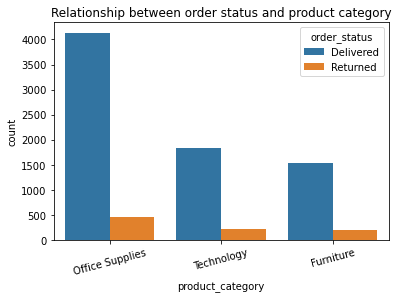

In [105]:
## plotting
sb.countplot(data = new_transaction, x = 'product_category', hue = 'order_status')
plt.title('Relationship between order status and product category')
plt.xticks(rotation = 15);

## Observation

Orders retured were 868 and office supplies got rejected the most.

## Question 4

Which Year did the company incurred the least shipping cost?

In [55]:
## Sales total per manager
c=(new_transaction.groupby(['shipyear']).shipping_cost.sum())
c.sort_values(ascending=True)

shipyear
2011    23715
2010    26001
2012    26028
2009    27031
Name: shipping_cost, dtype: int32

# Observation

The company incurred the least shipping cost in 2011

## Question 5

Display the day of the week in which customer segment has the most sales?

In [85]:
## Sales total per region
c=(new_transaction.groupby(['customer_segment']).sales.sum())
c.sort_values(ascending=False)

customer_segment
Corporate         5473574
Home Office       3537685
Consumer          3047607
Small Business    2780147
Name: sales, dtype: int32

Text(0.5, 1.0, 'Sales made per day in each customer segment')

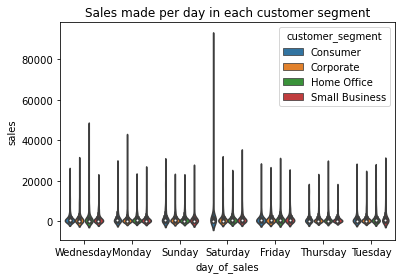

In [88]:
## plotting
sb.violinplot(x = 'day_of_sales', y = 'sales', hue = 'customer_segment', data = new_transaction)
plt.title('Sales made per day in each customer segment')


## Observation

Customer segment has most sales on Saturdays

## Question 6

What are the actual orders delivered in relation to profit?

The company want to determine its profitability by knowing the actual orders that were delivered.

In [89]:
## Order status per profit
c=(new_transaction.groupby(['order_status']).profit.sum())
c.sort_values(ascending=False)

order_status
Delivered    1320682
Returned      196070
Name: profit, dtype: int32

In [90]:
## Total of profit
new_transaction.profit.sum()

1516752

In [91]:
## delivered order profit percentage
(1320682/new_transaction.profit.sum())

0.8707303501165649

In [92]:
## actual value of each
new_transaction['order_status'].value_counts()

Delivered    7501
Returned      868
Name: order_status, dtype: int64

In [93]:
7501/(7501+868)

0.8962839048870833

Text(0.5, 1.0, 'Order status per profit made')

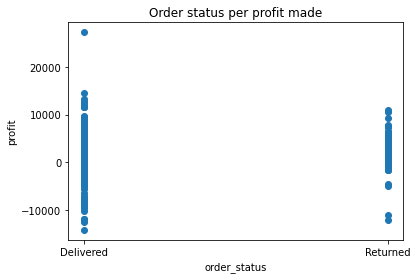

In [106]:
## Plotting
plt.scatter(data = new_transaction, x = 'order_status', y = 'profit', alpha = 1)
plt.xlabel('order_status')
plt.ylabel('profit')
plt.title('Order status per profit made')

## Observation

Approximately 90% of orders were delivered and these orders resulted to about 87% profit, thus the company is making profit.

## Question 7

The Organization is eager to know the customer names and persons born in 2011?

In [96]:
## find the unique birth year
new_transaction.birthyear.unique()

array([1970., 1969., 1972., 1968., 1967., 1983., 1948., 1982., 1949.,
       1950., 1951., 1952., 1981., 1980., 1953., 1954., 1984., 1955.,
       1956., 1957., 1958., 1979., 1977., 1959., 1960., 1961., 1978.,
       1963., 1971., 1966., 1965., 1964., 1939., 1940., 1942., 1943.,
       1945., 1946., 1976., 1947., 1962., 1936., 1937., 1938., 1941.,
       1944., 1974., 1973., 1975., 1934., 1935., 1930., 1928., 1914.,
       1931., 1932., 1933., 1926., 1915., 1916., 1924., 1925., 1920.,
       1917., 1923., 1927.])

# Observation
There was no customer born in 2011

 ## Question 8
 
 What are the aggregate orders made by all the customers?

In [97]:
## Aggregate of orders
new_transaction.order_quantity.sum()

213986

# Observation

Total orders of 213986 were made by all the customers.

## Question 9

The company intends to discontinue any product that brings in the least profit, you are required to help the organization to determine the product?

Text(0.5, 1.0, 'profit per product_category')

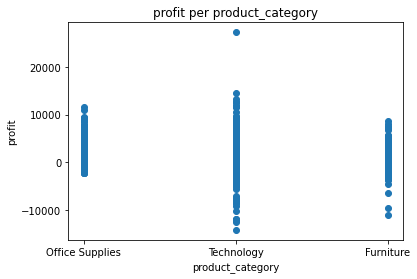

In [100]:
## plotting
plt.scatter(x = 'product_category', y = 'profit', data = new_transaction)
plt.xlabel('product_category')
plt.ylabel('profit')
plt.title('profit per product_category')

In [101]:
## Product category per profit
c=(new_transaction.groupby(['product_category']).profit.sum())
c.sort_values(ascending=False)

product_category
Technology         882945
Office Supplies    515632
Furniture          118175
Name: profit, dtype: int32

In [102]:
## Product sub category per profit
c=(new_transaction.groupby(['product_sub-category']).profit.sum())
c.sort_values(ascending=False)

product_sub-category
Telephones and Communication      314771
Binders and Binder Accessories    306729
Office Machines                   306360
Copiers and Fax                   167356
Chairs & Chairmats                149058
Office Furnishings                 99793
Appliances                         97153
Computer Peripherals               94458
Envelopes                          47927
Paper                              45980
Labels                             13563
Pens & Art Supplies                 7540
Storage & Organization              4614
Rubber Bands                         -93
Scissors, Rulers and Trimmers      -7781
Bookcases                         -33522
Tables                            -97154
Name: profit, dtype: int32

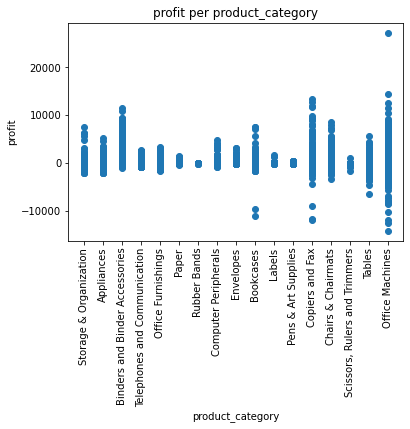

In [107]:
## plotting
plt.scatter(data = new_transaction, x = 'product_sub-category', y = 'profit', alpha = 1)
plt.xlabel('product_category')
plt.ylabel('profit')
plt.title('profit per product_category')
plt.xticks(rotation = 90);

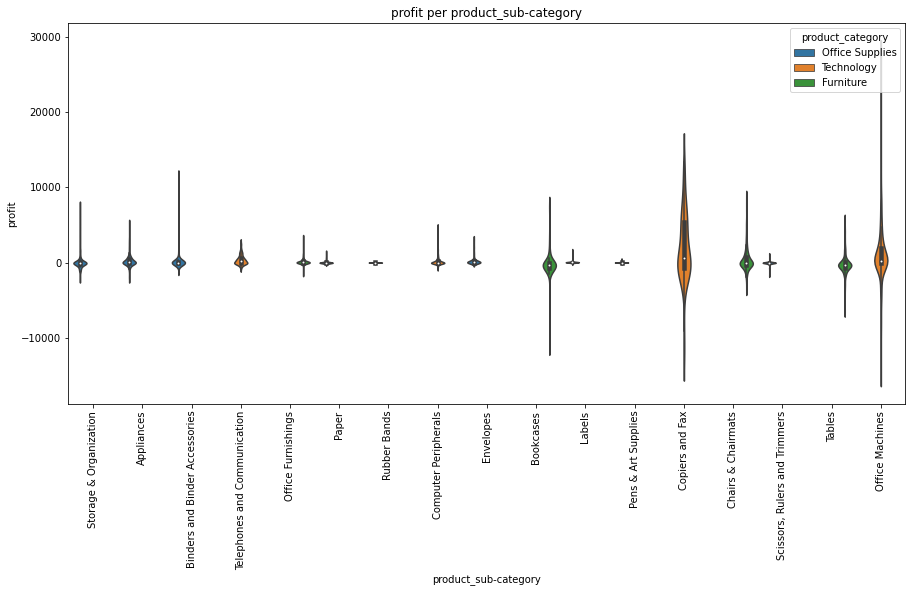

In [114]:
## plotting
plt.figure(figsize = [15, 7])
sb.violinplot(x = 'product_sub-category', y = 'profit', hue = 'product_category', data = new_transaction)
plt.xlabel('product_sub-category')
plt.ylabel('profit')
plt.title('profit per product_sub-category')
plt.xticks(rotation = 90);

## Observation

Rubber Bands, Scissors, Rulers and Trimmers, Bookcases and Tables brought the least profit and also loss to the company and I will recommend that these products be discontinued. Tables and bookcases brought about the greatest loss and should not be included in the companies sales in the coming years.

## Question 10

What are the top 2 best selling items that the company should keep selling?

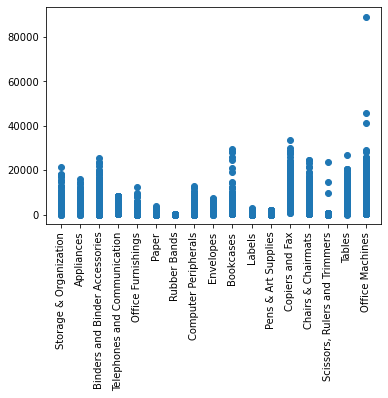

In [115]:
## Plotting
plt.scatter(data = new_transaction, x = 'product_sub-category', y = 'sales', alpha = 1)
plt.xticks(rotation = 90);

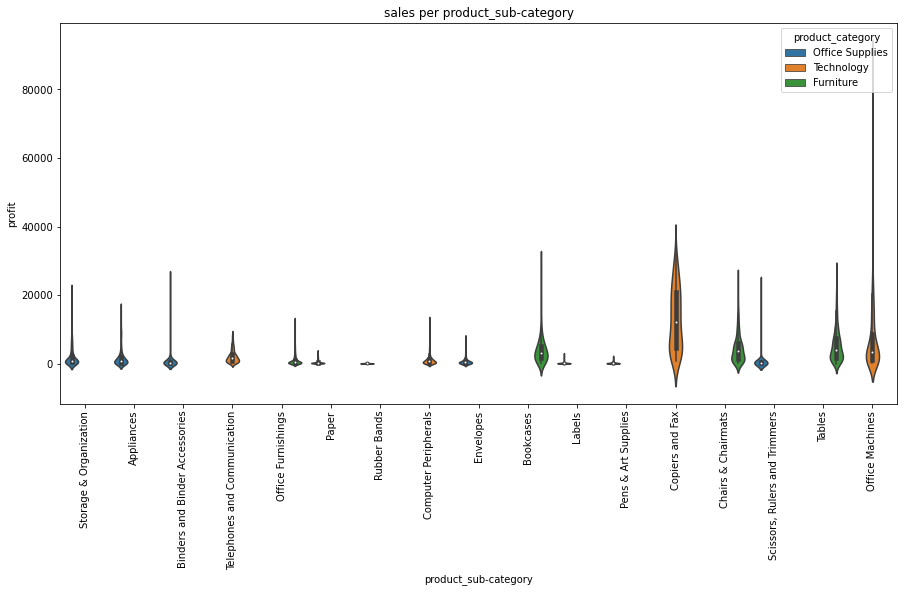

In [116]:
## plotting
plt.figure(figsize = [15, 7])
sb.violinplot(x = 'product_sub-category', y = 'sales', hue = 'product_category', data = new_transaction)
plt.xlabel('product_sub-category')
plt.ylabel('profit')
plt.title('sales per product_sub-category')
plt.xticks(rotation = 90);

In [117]:
## sales per product
c=(new_transaction.groupby(['product_sub-category']).sales.sum())
c.sort_values(ascending=False)

product_sub-category
Office Machines                   2142690
Tables                            1885558
Telephones and Communication      1881338
Chairs & Chairmats                1757701
Copiers and Fax                   1130311
Storage & Organization            1056212
Binders and Binder Accessories    1018586
Bookcases                          822559
Computer Peripherals               795135
Appliances                         736779
Office Furnishings                 694087
Paper                              443804
Envelopes                          173078
Pens & Art Supplies                166787
Scissors, Rulers and Trimmers       80627
Labels                              38848
Rubber Bands                        14913
Name: sales, dtype: int32

## Observation

Tables despite making much sales resulted in loss. Therefore, office machines and telephones and communications were the best selling items and I recommend the company to keep selling them.

## Findings

-Pat made the best sales and profit and manages four region; West, Quebec, Yukon and Ontario. 

-Delivery truck was used as a ship mode for 1140 times and was the second popular shipping mode.

-retured were 868 and office supplies got rejected the most. 

-The company incurred the least shipping cost in 2011. 

-Customer segment has most sales on Saturdays. 

-Approximately 90% of orders were delivered and these orders resulted to about 87% profit, thus the company is making profit. 

-There was no customer born in 2011. 

-Total orders of 213986 were made by all the customers. 

-Rubber Bands, Scissors, Rulers and Trimmers, Bookcases and Tables brought the least profit and also loss to the company and I will recommend that these products be discontinued. Tables and bookcases brought about the greatest loss and should not be included in the companies sales in the coming years. 

-Tables despite making much sales resulted in loss. Therefore, office machines and telephones and communications were the best selling items and I recommend the company to keep selling them.

## Conclusion

This company was profitable and will possibly overcome future competitors. 